In [7]:
import numpy as np
import matplotlib.pyplot as plt

https://docs.scipy.org/doc/scipy/reference/index.html

# Interpolate

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

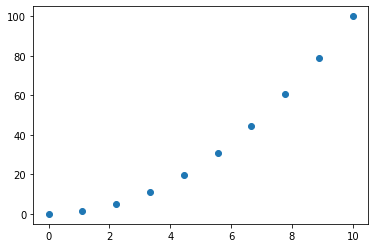

In [10]:

x = np.linspace(0,10,10)
y = x**2
plt.scatter(x,y)


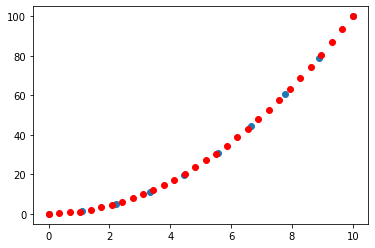

In [17]:
from scipy.interpolate import interp1d #retounre la fonction d'interpolation
f = interp1d(x,y, kind="linear")
new_x = np.linspace(0,10,30)
result=f(new_x)
plt.scatter(x,y)
plt.scatter(new_x,result,c="r")

# Optimize

https://docs.scipy.org/doc/scipy/reference/optimize.html

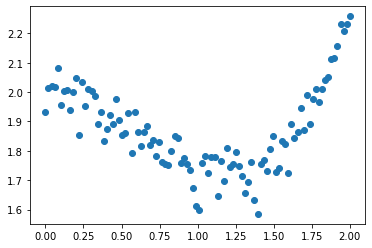

In [33]:
x = np.linspace(0,2,100)
y = 1/3*x**3-3/5*x**2+2+np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [34]:
def f(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

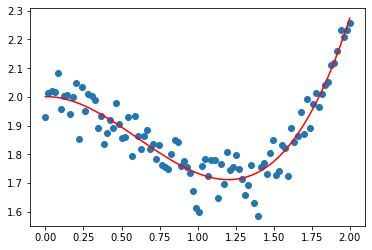

In [35]:
from scipy import optimize
params, param_cov = optimize.curve_fit(f,x,y) #méthode des moindres carrés pour fit le grpahe
plt.scatter(x,y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]),c="r")

### Minimisation

In [36]:
def f(x):
    return x**2 + 15*np.sin(x)

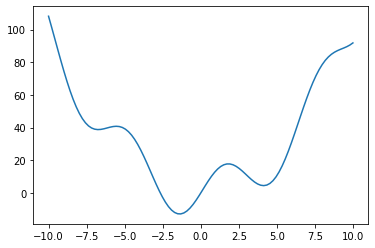

In [37]:
x = np.linspace(-10,10,100)
plt.plot(x,f(x))

In [44]:
optimize.minimize(f, x0=-5).x #à partir de x0 cherche le minimum le plus proche

array([-1.38505583])

# Signal 

https://docs.scipy.org/doc/scipy/tutorial/fft.html

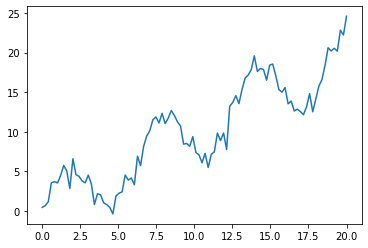

In [49]:
x = np.linspace(0,20,100)
y = x +4*np.sin(x)+np.random.randn(x.shape[0])
plt.plot(x,y)

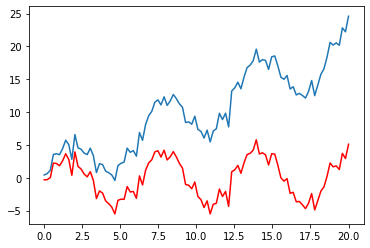

In [52]:
from scipy import signal
new_y = signal.detrend(y) #élimine la tendance linéaire
plt.plot(x,y)
plt.plot(x, new_y, c ="r")

### Transformation de Fourier
Filtrer un signal

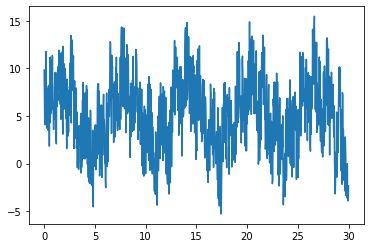

In [65]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x)+2*np.sin(5*x) +np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)

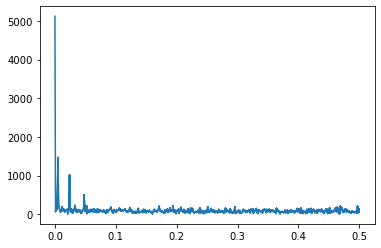

In [77]:
from scipy import fftpack
fourier = fftpack.fft(y)
power =np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences),power) #correspond aux 3  fréquences

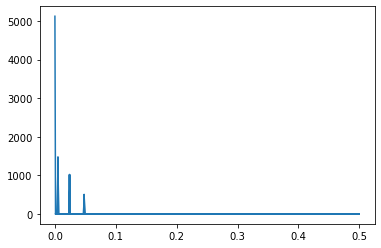

In [81]:
fourier[power < 400] = 0
plt.plot(np.abs(frequences),np.abs(fourier))

/Users/rayan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


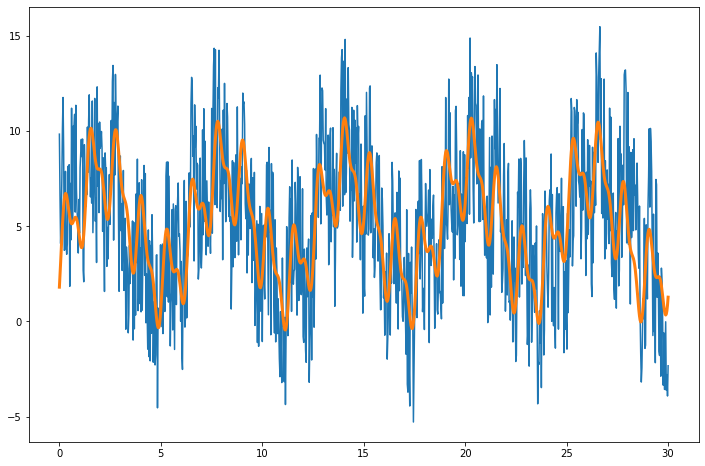

In [86]:
filtered_signal=fftpack.ifft(fourier)
plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.plot(x, filtered_signal, lw=3)

# Image processing

https://docs.scipy.org/doc/scipy/reference/ndimage.html

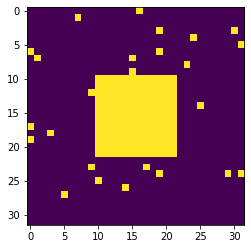

In [87]:
from scipy import ndimage
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10,10:-10]=1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)]=1
plt.imshow(X)

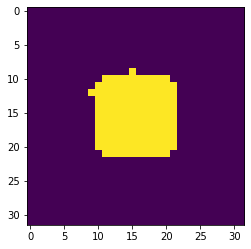

In [89]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

### Application

(496, 534)

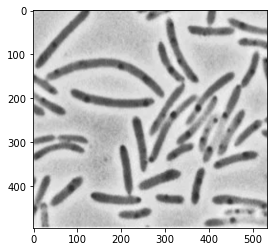

In [97]:
image = plt.imread("bacteria.png")
image = image[:,:,0]
plt.imshow(image,cmap="gray")
image.shape

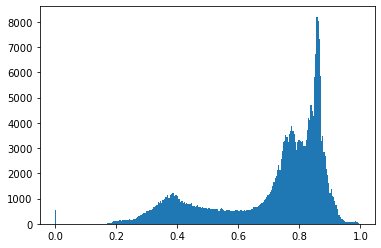

In [99]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

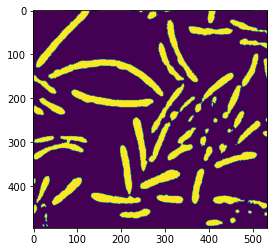

In [108]:
image = image < 0.6
plt.imshow(image)

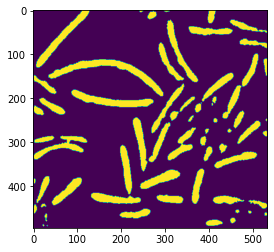

In [109]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [115]:
label_image , n_labels= ndimage.label(open_x)
print(n_labels)

64


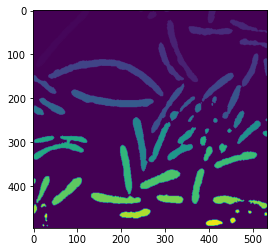

In [116]:
plt.imshow(label_image) #groupe des bactéries créées

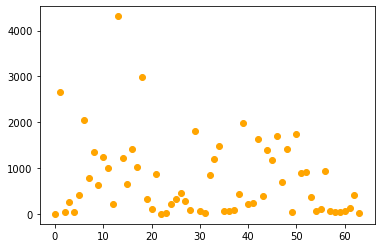

In [119]:
sizes = ndimage.sum(open_x, label_image, range(n_labels))
plt.scatter(range(n_labels), sizes, c ="orange")